In [1]:
using Oceananigans
using JLD2
using CairoMakie
using Statistics
using ImageFiltering: imfilter, Kernel.gaussian

[ Info: Oceananigans will use 4 threads


In [105]:
include("src/figures/energy_loss.jl")
include("src/figures/frontogenesis_bu.jl")
include("src/figures/streamfunction_terms.jl")
include("src/figures/xy_states.jl")
include("src/figures/xz_states.jl")
include("src/figures/zt_energy_loss.jl")

zt_energy_loss (generic function with 1 method)

In [73]:
runnames = ["Ro08Ri000Ek0A15", "Ro08Ri010Ek0A15", "Ro08Ri020Ek0A15"]
runlabels = [L"0.00", L"0.10", L"0.20"]
legendtitle = L"\text{Ri}";

# Energy loss from thermal wind state

## Fluxes

### Sum

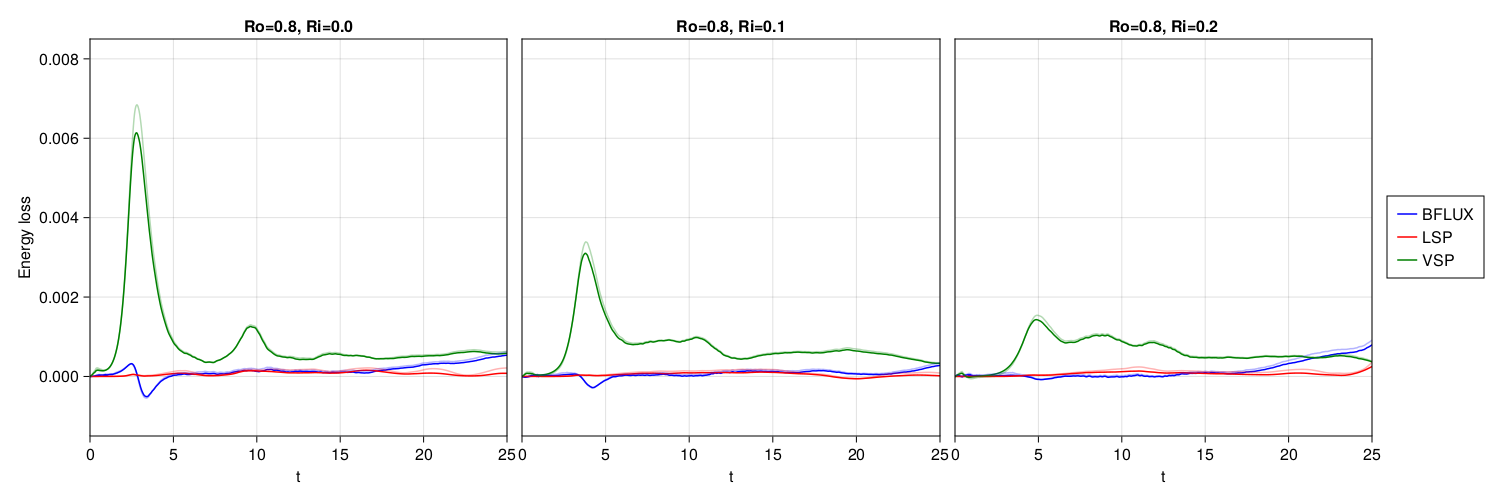

In [35]:
energy_loss_fig = energy_loss(runnames; resolution=(1500, 500))
save("output/poster_figures/energy_loss.png", energy_loss_fig; px_per_unit=2)
energy_loss_fig

### Vertical dependence

In [38]:
zt_energy_loss_figs = map(runnames) do runname 
    fig = zt_energy_loss(runname; resolution=(1500, 500))
    save("output/poster_figures/zt_energy_loss_$runname.png", fig; px_per_unit=2)
    fig
end

3-element Vector{Figure}:
 Figure()
 Figure()
 Figure()

# Frontogenesis

## Buoyancy and velocity

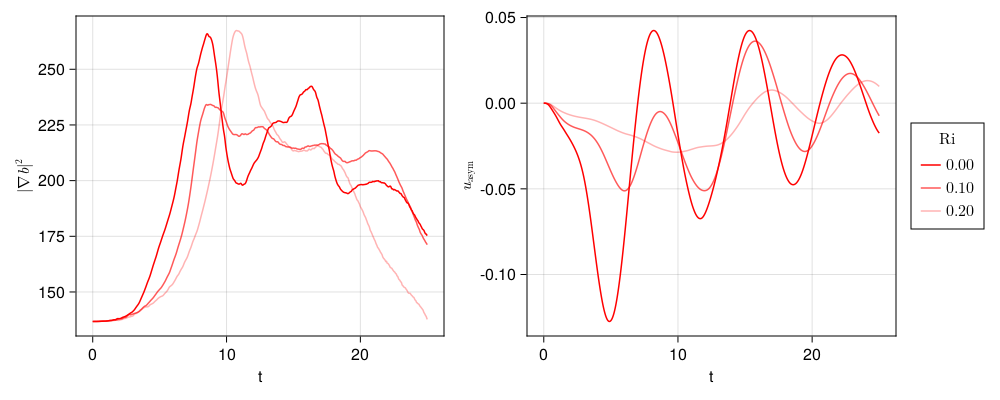

In [39]:
frontogenesis_bu_fig = frontogenesis_bu(runnames, 118:128, legendtitle, runlabels; σ=0, resolution=(1000, 400))
save("output/poster_figures/frontogenesis_bu.png", frontogenesis_bu_fig; px_per_unit=2)
frontogenesis_bu_fig

# Streamfunction

## Term balance

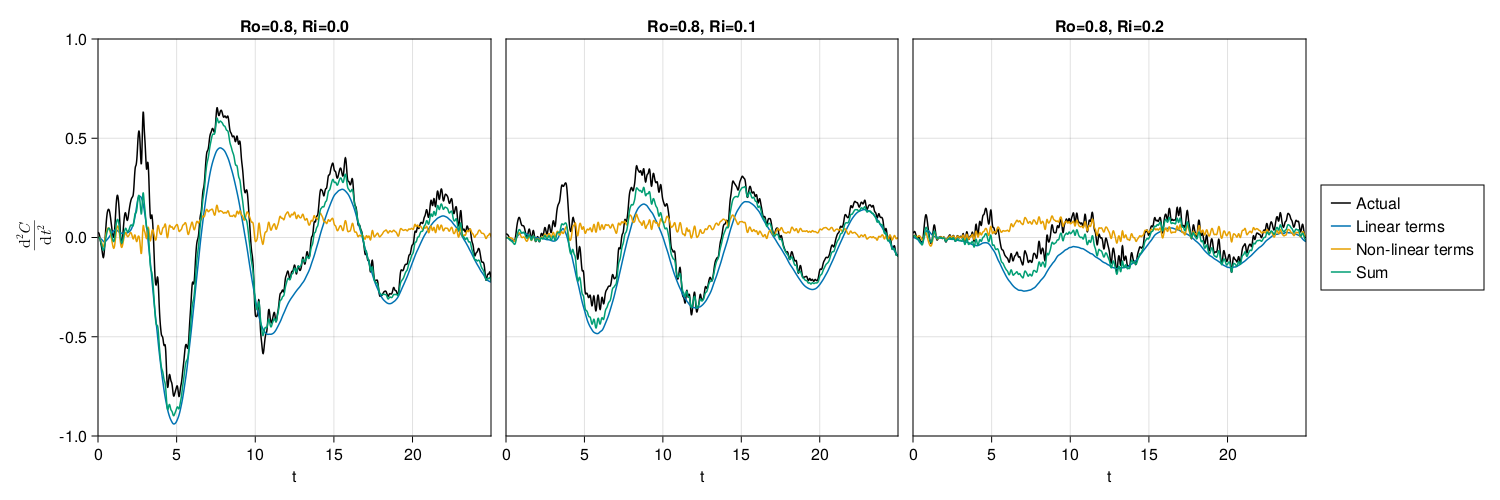

In [80]:
ψterms_fig = ψterms_plot(runnames; resolution=(1500, 500),  σ=5)
save("output/poster_figures/streamfunction_terms.png", ψterms_fig; px_per_unit=2)
ψterms_fig

# State

## Horizontal

In [44]:
xy_states_figs = map(runnames) do runname 
    fig = xy_states(runname, [2, 3, 4, 5], 118:128; resolution=(2000, 500), σ=3, field="v")
    save("output/poster_figures/xy_states_$runname.png", fig; px_per_unit=2)
    fig
    end

3-element Vector{Figure}:
 Figure()
 Figure()
 Figure()

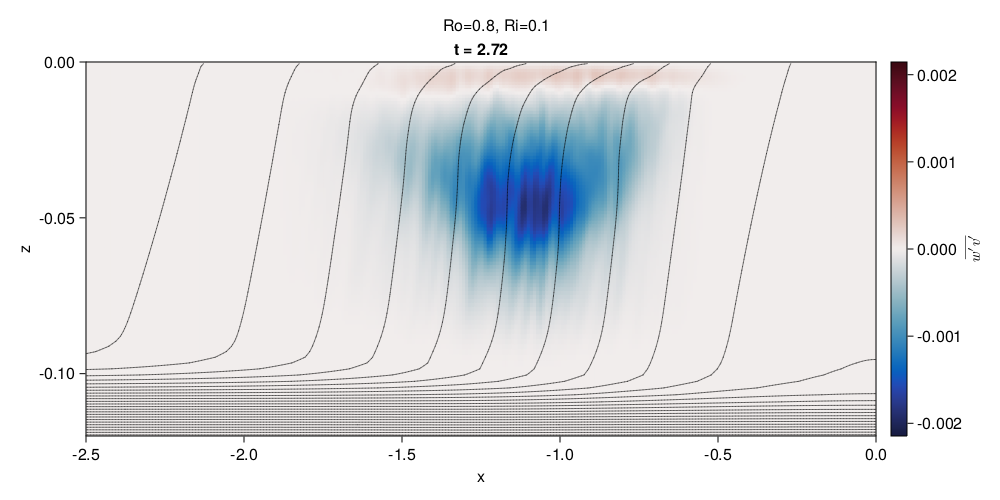

In [134]:
xz_states(runnames[2], [373]; σ=1, resolution=(1000, 500), field="w′v′", limits=(-2.5, -0, -0.12, 0))

In [136]:
xz_states_figs = map(zip(runnames, tsi)) do (runname, t)
    fig = xz_states(runname, [t]; resolution=(1000, 500), field="w′v′", limits=(-2.5, -0, -0.12, 0),)
    save("output/poster_figures/xz_states_fluc_earlier_$runname.png", fig; px_per_unit=2)
    fig
    end

3-element Vector{Figure}:
 Figure()
 Figure()
 Figure()

In [135]:
tsi = [383, 473, 600] .- 100

3-element Vector{Int64}:
 283
 373
 500